In [689]:
import numpy as np
import cv2 as cv
import cv2
from IPython.display import display 
from PIL import Image 
from imutils import contours
from imutils import paths
import imutils
from skimage import data, img_as_float
from skimage import measure
from skimage.metrics import structural_similarity as ssim

In [690]:
abcd123_c = np.array(Image.open('./abcd123.png'))
bcd12a_c = np.array(Image.open('./bcd12a.png'))
dad32_c = np.array(Image.open('./dad32.png'))

abcd123 = cv.imread('./abcd123.png', 0)
bcd12a = cv.imread('./bcd12a.png', 0)
dad32 = cv.imread('./dad32.png', 0)

one = cv.imread('./benchmark/1.png',0)
two = cv.imread('./benchmark/2.png',0)
three = cv.imread('./benchmark/3.png',0)
a = cv.imread('./benchmark/A.png',0)
b = cv.imread('./benchmark/B.png',0)
C = cv.imread('./benchmark/C.png',0)
d = cv.imread('./benchmark/D.png',0)
benchmarks = [one, two, three, a, b, c, d]

In [691]:
def resizer(imgArray, size=256):
    dim = (size, size)
    resizedArray = []
    length = len(imgArray)
    print(imgArray[0])
    for i in range(length):
        img = imgArray[i]
        resizedArray.append(cv.resize(img, dim))  
    
    return resizedArray

def threshold(imgArray):
    thresholdedArray = []
    length = len(imgArray)
    for i in range(length):
        img = imgArray[i]
        thresholdedArray.append(cv.adaptiveThreshold(img,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,21,5)) 

    return thresholdedArray

## abcd123

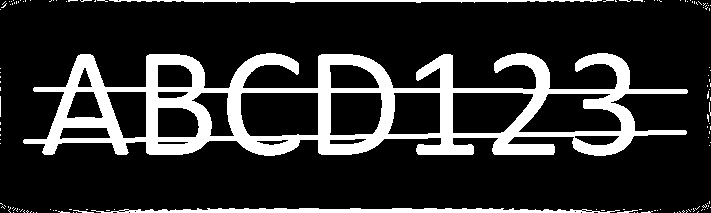

In [692]:
bw = cv.adaptiveThreshold(abcd123,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,29,10)
display(Image.fromarray(bw))

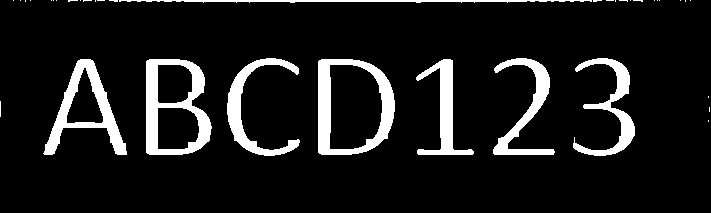

In [693]:
kernel = np.ones((2,1), np.uint8)
erosion = cv.erode(bw, kernel, iterations=5)
display(Image.fromarray(erosion))

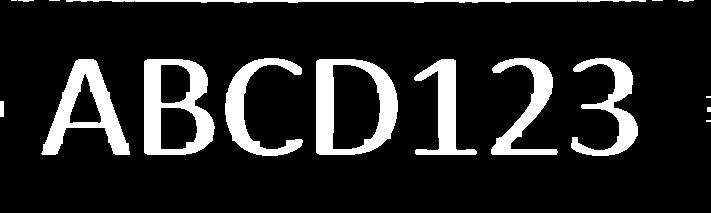

In [694]:
kernel = np.ones((1,6), np.uint8)
dilation = cv.dilate(erosion, kernel, iterations=1)
display(Image.fromarray(dilation))

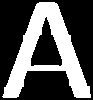

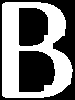

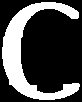

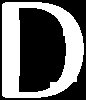

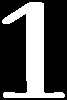

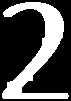

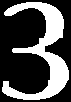

In [695]:
mask = np.zeros_like(abcd123, dtype=np.uint8)
cnts = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0
tokens1 = []
for c in cnts:
    area = cv.contourArea(c)
    if area > 1000:
        x,y,w,h = cv.boundingRect(c)

        ROI = 255 - dilation[y-2:y+h+2, x-2:x+w+2]
        cropped = dilation[y-2:y+h+2, x-2:x+w+2]
        tokens1.append(cropped)
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./ABCD123/ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

## dad32

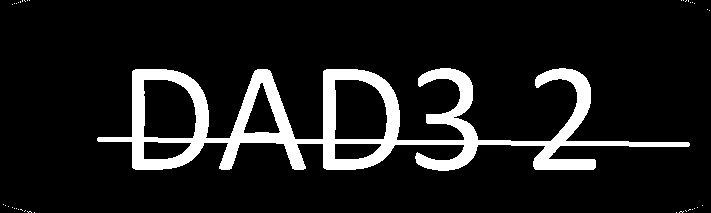

In [696]:
bw = cv.adaptiveThreshold(dad32,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,23,15)
display(Image.fromarray(bw))

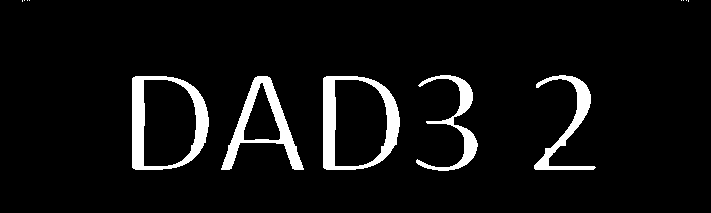

In [697]:
kernel = np.ones((2,1), np.uint8)
erosion = cv.erode(bw, kernel, iterations=7)
display(Image.fromarray(erosion))

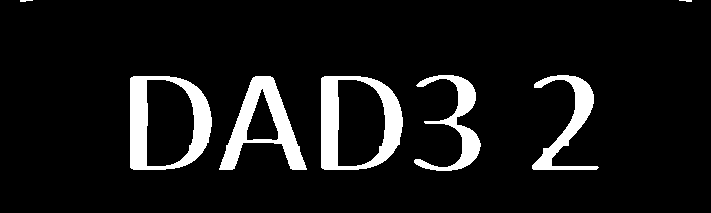

In [698]:
kernel = np.ones((1,6), np.uint8)
dilation = cv.dilate(erosion, kernel, iterations=1)
display(Image.fromarray(dilation))

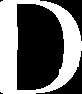

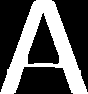

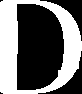

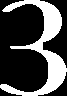

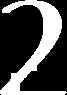

In [699]:
mask = np.zeros_like(dad32, dtype=np.uint8)
cnts = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0
tokens2 = []
for c in cnts:
    area = cv.contourArea(c)
    if area > 400:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - dilation[y:y+h, x:x+w]
        cropped = dilation[y:y+h, x:x+w]
        tokens2.append(cropped)
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./DAD32/ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

## bcd12a

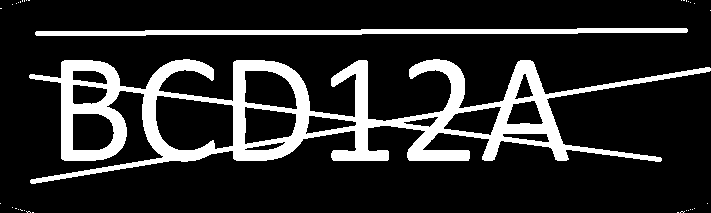

In [700]:
bw = cv.adaptiveThreshold(bcd12a,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,23,15)
display(Image.fromarray(bw))

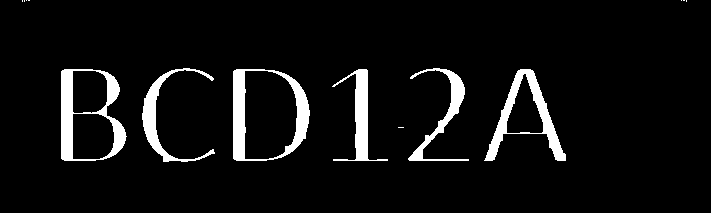

In [701]:
kernel = np.ones((2,1), np.uint8)
erosion = cv.erode(bw, kernel, iterations=9)
display(Image.fromarray(erosion))

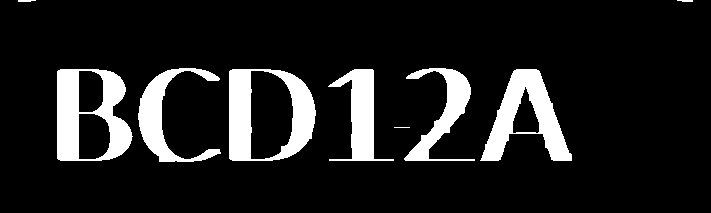

In [702]:
kernel = np.ones((1,6), np.uint8)
dilation = cv.dilate(erosion, kernel, iterations=2)
display(Image.fromarray(dilation))

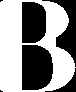

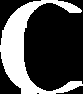

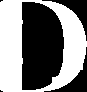

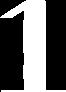

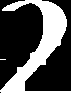

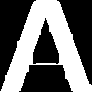

In [703]:
mask = np.zeros_like(dad32, dtype=np.uint8)
cnts = cv.findContours(dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0
tokens3 = []
for c in cnts:
    area = cv.contourArea(c)
    if area > 400:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - dilation[y:y+h, x:x+w]
        cropped = dilation[y:y+h, x:x+w]
        tokens3.append(cropped)
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./BCD12A/ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

## Benchmarks

### one

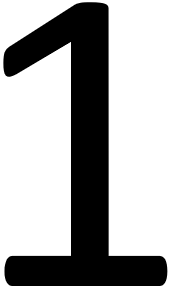

In [704]:
mask = np.zeros_like(one, dtype=np.uint8)
cnts = cv.findContours(one, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 400:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - one[y:y+h, x:x+w]
        cropped = one[y:y+h, x:x+w]
     
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_1.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### two

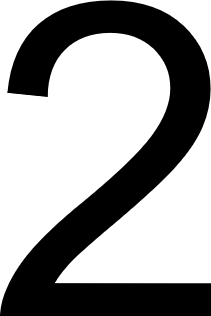

In [705]:
mask = np.zeros_like(two, dtype=np.uint8)
cnts = cv.findContours(two, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 400:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - two[y:y+h, x:x+w]
        cropped = two[y:y+h, x:x+w]
        
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_2.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### three

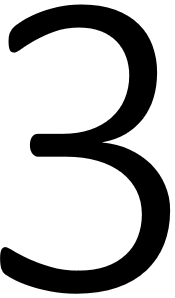

In [706]:
mask = np.zeros_like(three, dtype=np.uint8)
cnts = cv.findContours(three, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 400:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - three[y:y+h, x:x+w]
        cropped = three[y:y+h, x:x+w]
       
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_3.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### A

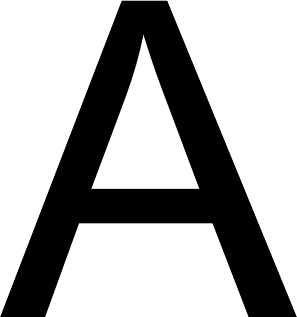

In [707]:
mask = np.zeros_like(a, dtype=np.uint8)
cnts = cv.findContours(a, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 20000:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - a[y:y+h, x:x+w]
        cropped = a[y:y+h, x:x+w]
        
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_4.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### B

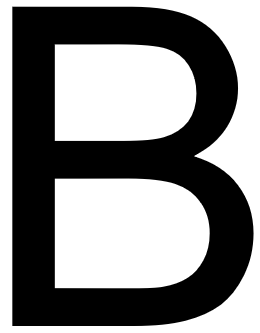

In [708]:
mask = np.zeros_like(b, dtype=np.uint8)
cnts = cv.findContours(b, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 20000:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - b[y:y+h, x:x+w]
        cropped = b[y:y+h, x:x+w]
        
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_5.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### C

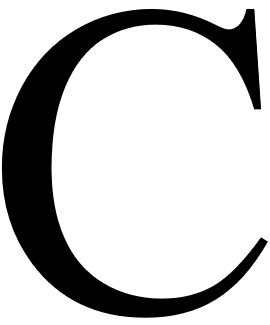

In [709]:
mask = np.zeros_like(C, dtype=np.uint8)
cnts = cv.findContours(C, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 20000:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - C[y:y+h, x:x+w]
        cropped = C[y:y+h, x:x+w]
        
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_6.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

### D

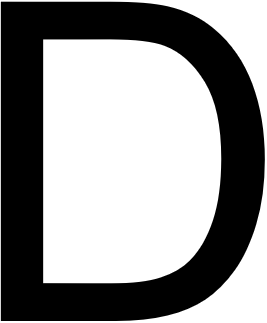

In [710]:
mask = np.zeros_like(d, dtype=np.uint8)
cnts = cv.findContours(d, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0

for c in cnts:
    area = cv.contourArea(c)
    if area > 9100:
        x,y,w,h = cv.boundingRect(c)
        ROI = 255 - d[y:y+h, x:x+w]
        cropped = d[y:y+h, x:x+w]
        
        cv.drawContours(mask, [c], -1, (0,255,0), 2)
        cv.imwrite('./benchmark/ROI_7.png', ROI)
        ROI_number += 1
        display(Image.fromarray(cropped))

In [711]:
one_thresh = cv.imread('./benchmark/ROI_1.png',0)
two_thresh = cv.imread('./benchmark/ROI_2.png',0)
three_thresh = cv.imread('./benchmark/ROI_3.png',0)
a_thresh = cv.imread('./benchmark/ROI_4.png',0)
b_thresh = cv.imread('./benchmark/ROI_5.png',0)
C_thresh = cv.imread('./benchmark/ROI_6.png',0)
d_thresh = cv.imread('./benchmark/ROI_7.png',0)
benchmarks_thresh = [one_thresh, two_thresh, three_thresh, a_thresh, b_thresh, C_thresh, d_thresh]
benchmarks_dict = {0:'1', 1:'2', 2:'3', 3:'A', 4:'B', 5:'C', 6:'D'}

In [712]:
thresholded_benchmarks = threshold(benchmarks_thresh)
resized_benchmarks = resizer(benchmarks_thresh)

resized_tokens1 = resizer(tokens1)
resized_tokens2 = resizer(tokens2)
resized_tokens3 = resizer(tokens3)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [713]:
def detector(resized_tokens):
    mapper_dict = {}
    length = len(resized_tokens)
    mapper = np.zeros(shape=(1,length))
    for i in range(len(resized_tokens)):
        token = resized_tokens[i]
        max_s = -1
        for j in range(len(resized_benchmarks)):
            benchmark = resized_benchmarks[j]
            s = ssim(benchmark, token)

            if s > max_s:
                max_s = s
                max_benchmark = j

        mapper[0, i] = max_benchmark
        mapper_dict[i] = benchmarks_dict[max_benchmark]

    return mapper_dict.values()

In [714]:
res = detector(resized_tokens1)
res

dict_values(['A', 'B', 'C', 'D', '1', '2', '3'])

In [715]:
res = detector(resized_tokens2)
res

dict_values(['D', 'A', 'D', '3', '2'])

In [716]:
res = detector(resized_tokens3)
res

dict_values(['B', 'C', 'D', '1', '2', 'A'])